In [1]:
!pip install sklearn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: c:\users\yash thavkar\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dff = pd.read_csv('income.csv')
dff.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
dff.shape

(22, 3)

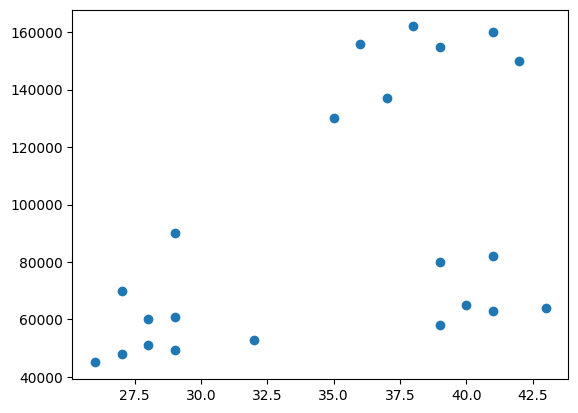

In [6]:
plt.scatter(dff['Age'],dff['Income($)'])

In [7]:
km = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(dff[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
len(y_predicted)

22

In [10]:
dff['cluster']=y_predicted
dff.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
df0=dff[dff.cluster==0]
df1=dff[dff.cluster==1]
df2=dff[dff.cluster==2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


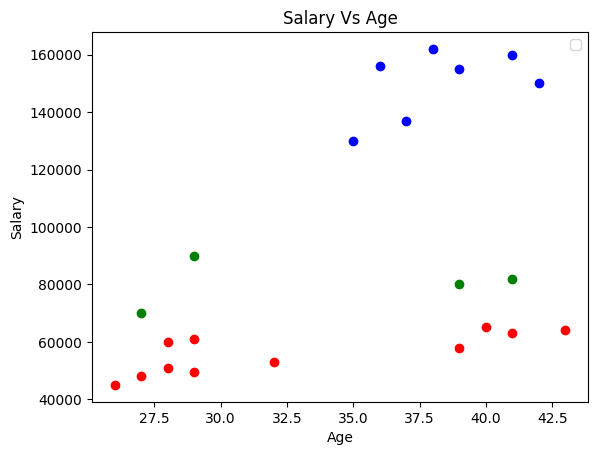

In [12]:
plt.scatter(df0.Age, df0['Income($)'], c='r')
plt.scatter(df1.Age, df1['Income($)'], c='b')
plt.scatter(df2.Age, df2['Income($)'], c='g')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Vs Age')
plt.legend()

# Scaler, with respect to Income

In [13]:
scaler= MinMaxScaler()
scaler.fit(dff[['Income($)']])

MinMaxScaler()

In [14]:
dff['Income($)']= scaler.transform(dff[['Income($)']])
dff.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


# Scaler, with respect to age

In [15]:
scaler.fit(dff[['Age']])
dff.Age= scaler.transform(dff[['Age']])
dff.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [16]:
km =KMeans(n_clusters=3)
y_predicted= km.fit_predict(dff[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [17]:
dff['cluster']= y_predicted
#dff.drop('cluster',axis='columns', inplace=True)
dff.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [18]:
df0=dff[dff.cluster==0]
df1=dff[dff.cluster==1]
df2=dff[dff.cluster==2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


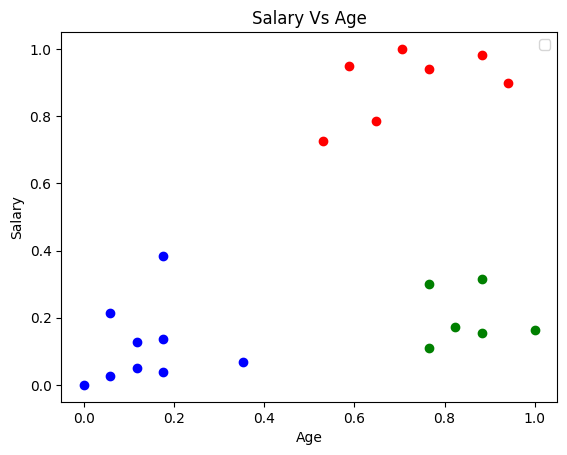

In [19]:
plt.scatter(df0.Age, df0['Income($)'], c='r')
plt.scatter(df1.Age, df1['Income($)'], c='b')
plt.scatter(df2.Age, df2['Income($)'], c='g')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Vs Age')
plt.legend()

In [20]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

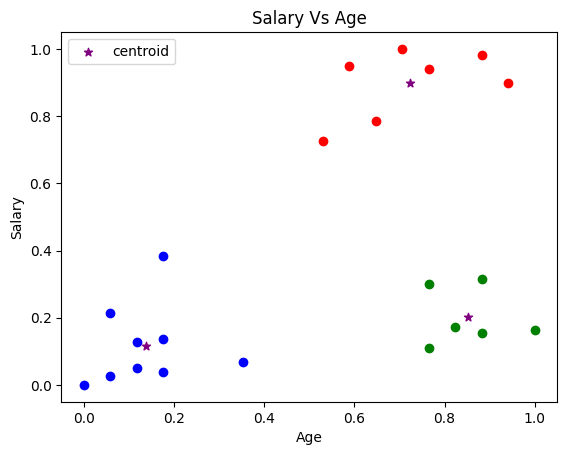

In [21]:
plt.scatter(df0.Age, df0['Income($)'], c='r')
plt.scatter(df1.Age, df1['Income($)'], c='b')
plt.scatter(df2.Age, df2['Income($)'], c='g')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color ='purple', marker ='*', label ='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary Vs Age')
plt.legend()